In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M = 200
N = 50

X = np.linspace(0, 1, M)
Y = np.linspace(0, 1, N)
XX, YY = np.meshgrid(X, Y)

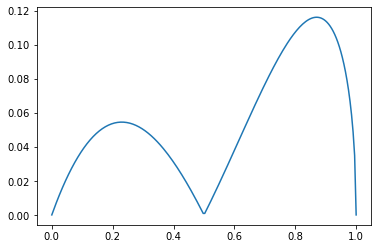

In [3]:
def f1(x): return np.sqrt(-x**2*(x-1/2)**2*(x-1))

plt.plot(X, f1(X))

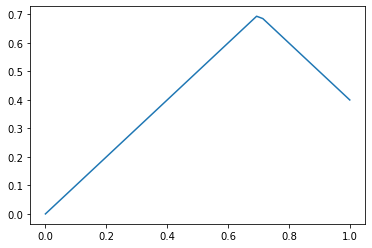

In [4]:
c = 0.7
def f2(y): return -abs(y-c) + c

plt.plot(Y, f2(Y))

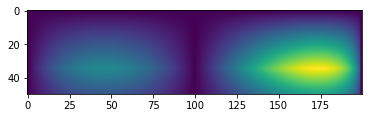

In [5]:
def γ(x,y): return f1(x)*f2(y)

Γ = γ(XX,YY)
plt.imshow(Γ)

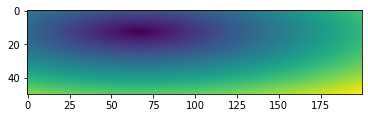

In [6]:
import cvxpy as cp

def d(x,p): return cp.norm(x-p)
def d_(x,p): return np.linalg.norm(x-p)

x = np.array([1/3,1/4])
D = [d_(x,(X[i],Y[j])) for i in range(M) for j in range(N)]

plt.imshow(np.transpose(np.reshape(D, (M, N))))

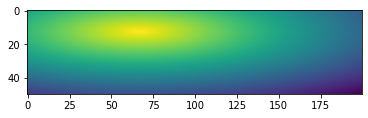

In [7]:
k = 3
#def s(d): return cp.exp(-k*d)
#def s_(d): return np.exp(-k*d)
def s(d): return -d
def s_(d): return -d

S = [s_(d_(x,(X[i],Y[j]))) for i in range(M) for j in range(N)]

plt.imshow(np.transpose(np.reshape(S, (M, N))))

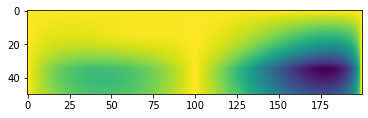

In [8]:
SΓ = [s_(d_(x,(X[i],Y[j])))*γ(X[i],Y[j]) for i in range(M) for j in range(N)]

plt.imshow(np.transpose(np.reshape(SΓ, (M, N))))

In [9]:
x_pb = cp.Variable(2)
f_obj = cp.sum([s(d(x_pb,(X[i],Y[j])))*γ(X[i],Y[j]) for i in range(M) for j in range(N)])

In [10]:
f_obj

Expression(CONCAVE, NONPOSITIVE, ())

In [11]:
pb = cp.Problem(cp.Maximize(f_obj), [x_pb[0] >= 0, x_pb[1] >= 0, x_pb[0] <= 1, x_pb[1] <= 1])

In [12]:
pb.solve()

-74.57509652715012

In [13]:
x_pb.value

array([0.68832863, 0.63436701])

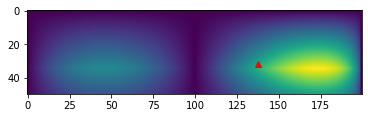

In [14]:
plt.imshow(Γ)
plt.plot(x_pb.value[0]*M, x_pb.value[1]*N, marker = '^', color = 'red')

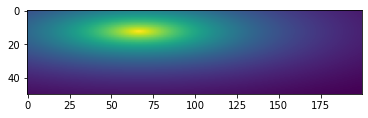

In [15]:
k = 3
def s(d): return cp.exp(-k*d)
def s_(d): return np.exp(-k*d)
#def s(d): return -d
#def s_(d): return -d

S = [s_(d_(x,(X[i],Y[j]))) for i in range(M) for j in range(N)]

plt.imshow(np.transpose(np.reshape(S, (M, N))))

In [17]:
x_pb = cp.Variable(2)
f_obj = cp.sum([s(d(x_pb,(X[i],Y[j])))*γ(X[i],Y[j]) for i in range(M) for j in range(N)])

f_obj

Expression(UNKNOWN, NONNEGATIVE, ())

In [18]:
pb = cp.Problem(cp.Maximize(f_obj), [x_pb[0] >= 0, x_pb[1] >= 0, x_pb[0] <= 1, x_pb[1] <= 1])
pb.solve()

DCPError: Problem does not follow DCP rules. Specifically:
The objective is not DCP. Its following subexpressions are not:
exp(-3.0 @ Pnorm(var220053 + -[0. 0.], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.        0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.        0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.        0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.        0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.         0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0. 1.], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.00502513 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01005025 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.01507538 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.0201005 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.02512563 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03015075 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.03517588 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04020101 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.04522613 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05025126 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.05527638 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06030151 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.06532663 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07035176 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.07537688 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08040201 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.08542714 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09045226 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.09547739 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10050251 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.10552764 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11055276 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.11557789 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12060302 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.12562814 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13065327 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.13567839 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14070352 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.14572864 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15075377 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.15577889 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16080402 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.16582915 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.17085427 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1758794 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18090452 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.18592965 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.19095477 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.1959799 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20100503 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.20603015 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.21105528 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2160804 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22110553 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.22613065 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.23115578 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.2361809 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24120603 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.24623116 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25125628 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.25628141 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26130653 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.26633166 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27135678 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.27638191 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28140704 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.28643216 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29145729 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.29648241 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30150754 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.30653266 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31155779 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.31658291 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32160804 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.32663317 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33165829 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.33668342 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34170854 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.34673367 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35175879 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.35678392 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36180905 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.36683417 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3718593 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.37688442 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38190955 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.38693467 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.3919598 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.39698492 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40201005 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.40703518 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4120603 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.41708543 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42211055 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.42713568 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.4321608 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.43718593 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44221106 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.44723618 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45226131 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.45728643 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46231156 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.46733668 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47236181 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.47738693 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48241206 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.48743719 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49246231 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.49748744 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50251256 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.50753769 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51256281 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.51758794 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52261307 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.52763819 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53266332 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.53768844 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54271357 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.54773869 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55276382 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.55778894 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.56281407 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5678392 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57286432 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.57788945 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.58291457 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.5879397 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59296482 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.59798995 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.60301508 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6080402 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61306533 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.61809045 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.62311558 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.6281407 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63316583 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.63819095 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64321608 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.64824121 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65326633 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.65829146 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66331658 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.66834171 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67336683 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.67839196 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68341709 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.68844221 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69346734 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.69849246 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70351759 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.70854271 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71356784 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.71859296 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72361809 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.72864322 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73366834 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.73869347 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74371859 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.74874372 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75376884 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.75879397 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7638191 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.76884422 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77386935 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.77889447 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.7839196 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.78894472 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79396985 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.79899497 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8040201 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.80904523 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81407035 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.81909548 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.8241206 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.82914573 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83417085 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.83919598 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84422111 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.84924623 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85427136 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.85929648 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86432161 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.86934673 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87437186 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.87939698 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88442211 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.88944724 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89447236 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.89949749 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90452261 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.90954774 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91457286 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.91959799 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92462312 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.92964824 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93467337 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.93969849 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94472362 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.94974874 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95477387 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.95979899 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96482412 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.96984925 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.97487437 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995 0.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995 0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995 0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995 0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995 0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995  0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.9798995 1.       ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98492462 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.98994975 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.2244898 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.3877551 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.6122449 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.7755102 ], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[0.99497487 1.        ], 2))
exp(-3.0 @ Pnorm(var220053 + -[1. 0.], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.02040816], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.04081633], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.06122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.08163265], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.10204082], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.12244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.14285714], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.16326531], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.18367347], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.20408163], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.        0.2244898], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.24489796], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.26530612], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.28571429], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.30612245], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.32653061], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.34693878], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.36734694], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.        0.3877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.40816327], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.42857143], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.44897959], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.46938776], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.48979592], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.51020408], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.53061224], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.55102041], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.57142857], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.59183673], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.        0.6122449], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.63265306], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.65306122], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.67346939], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.69387755], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.71428571], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.73469388], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.75510204], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.        0.7755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.79591837], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.81632653], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.83673469], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.85714286], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.87755102], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.89795918], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.91836735], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.93877551], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.95918367], 2))
exp(-3.0 @ Pnorm(var220053 + -[1.         0.97959184], 2))
exp(-3.0 @ Pnorm(var220053 + -[1. 1.], 2))